Modules that need to be downloaded : torchvision , wordcloud, tensorflow

In [1]:
import pandas as pd
# reading csv file
df=pd.read_csv("fake_news_dataset.csv")
(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [2]:
#checking the dataset
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)
#558 titles, 39 texts and 1957 authors are empty

,column,dtypes,nunique,sum_null
0,id,int64,20800,0
1,title,object,19803,558
2,author,object,4201,1957
3,text,object,20386,39
4,label,int64,2,0


In [3]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df.dropna(inplace=True)
df = df.drop_duplicates(keep='first')

In [5]:
count_row = df.shape[0] # Gives number of rows
print("Total articles in dataframe:",count_row,"\n")
title = df["title"].tolist() # Convert column "title" of the dataframe to a list and store to avariable
text = df["text"].tolist() # Convert column "text" of the dataframe to a list and store to avariable
label = df["label"].tolist()
print("Total title:",len(title))
print("Total text:",len(text))
print("Total labels:",len(label))

df.info()
#18285 rows and 5 cols

Total articles in dataframe: 18285 

Total title: 18285
Total text: 18285
Total labels: 18285
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [6]:
#after cleaning we have 18285 enteries
# store title, author and text in one column:

df['text'] = df['title'] +' ' + df['author'] + ' '+ df['text']  # Concatenate title and text into column alltext
df = df.reindex(columns=['text','label']) # Transform the dataset to contain only the label and text


#We now get rid of texts that have less than 50 charactors
df.drop(df[df.text.str.len() < 50].index, inplace=True)

#after cleaning we have 18274 enteries

def truncate_text_to_max_words(text,max_words): # Keep only the first max_words of each text
    text = text.split(maxsplit=max_words)
    text = ' '.join(text[:max_words])
    return text

max_words = 200 # Set the maximum number of words to be considered for each document for performance reasons

# Truncate text to first 200 words
df['text'] = df['text'].apply(truncate_text_to_max_words,args=(max_words,))
print("Samples:",len(df['text']))
print("Labels:",len(df['label']),"\n")

print(df['text'].iloc[0]) # Print first text as an example

df.info()

Samples: 18274
Labels: 18274 

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. As we now know, Comey notified the Republican chairmen and De

In [7]:
display(df.iloc[1])
print(df['text'].iloc[0])

text     FLYNN: Hillary Clinton, Big Woman on Campus - ...
label                                                    0
Name: 1, dtype: object

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. As we now know, Comey notified the Republican chairmen and Democratic ranking members of the

In [8]:
check(df)

,column,dtypes,nunique,sum_null
0,text,object,18226,0
1,label,int64,2,0


In [9]:
#EDA

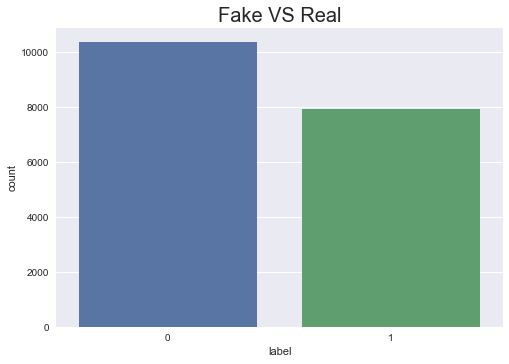

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

chart=sns.countplot(x='label',data=df)
plt.title("Fake VS Real",
          fontsize='20');
#Over 10000 articles are reliable and around 8000 are unrealiable

<AxesSubplot:xlabel='number_of_words', ylabel='Count'>

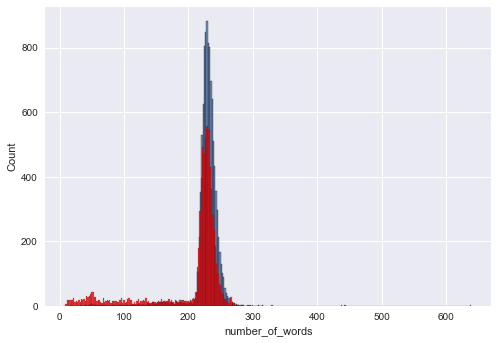

In [11]:
import nltk
from nltk import word_tokenize

df['number_of_characters'] = df['text'].apply(lambda x:len(x))
df['number_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# histplot for Fake News True News words
sns.histplot(df['number_of_words'][df['label'] == 0],bins=50,binwidth=2)
sns.histplot(df['number_of_words'][df['label'] == 1],color='red',binwidth=2)

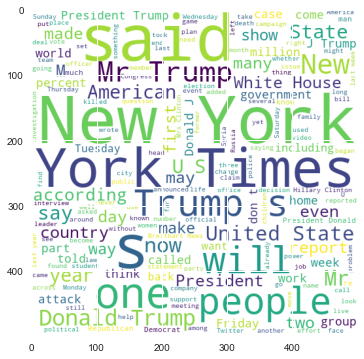

In [12]:
# pip install wordcloud
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

# WordCloud for True News
true_news_wc = wc.generate(df[df['label'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(true_news_wc)
plt.show()

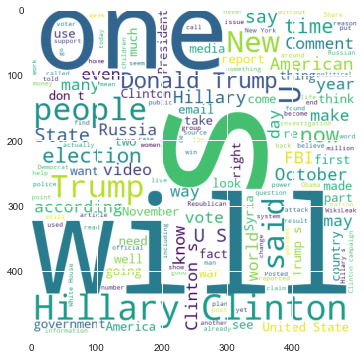

In [13]:
# WordCloud for Fake news
fake_news_wc = wc.generate(df[df['label'] == 1]['text'].str.cat(sep = " "))
plt.figure(figsize=(6,6))
plt.imshow(fake_news_wc)
plt.show()

In [14]:
count_row = df.shape[0] # Gives number of rows
print("Total articles in dataframe:",count_row,"\n")
text = df["text"].tolist() # Convert column "text" of the dataframe to a list and store to avariable
label = df["label"].tolist()
print("Total text:",len(text))
print("Total labels:",len(label))

Total articles in dataframe: 18274 

Total text: 18274
Total labels: 18274


# Word tokenisation

In [15]:
from nltk import word_tokenize # Import the word_tokenize function from NLTK

text_tokenised = []
title_tokenised=[]
labels_final = []

print("Tokenising text...",end="")
for i in range(len(text)):
    try:
        tokens = word_tokenize(text[i].lower()) # Tokenise text
        
        if(len(tokens)>1): # Discard single word tokens
            text_tokenised.append(tokens) #  Add text tokens to list
            labels_final.append(label[i]) # Add label for valid email to labels list
    except:
        pass
    
print("Total text:",len(text_tokenised))
print("Total labels:",len(labels_final),"\n")

print(text_tokenised[0]) # Print first text

Tokenising text...Total text: 18274
Total labels: 18274 

['house', 'dem', 'aide', ':', 'we', 'didn', '’', 't', 'even', 'see', 'comey', '’', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', 'darrell', 'lucus', 'house', 'dem', 'aide', ':', 'we', 'didn', '’', 't', 'even', 'see', 'comey', '’', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', 'by', 'darrell', 'lucus', 'on', 'october', '30', ',', '2016', 'subscribe', 'jason', 'chaffetz', 'on', 'the', 'stump', 'in', 'american', 'fork', ',', 'utah', '(', 'image', 'courtesy', 'michael', 'jolley', ',', 'available', 'under', 'a', 'creative', 'commons-by', 'license', ')', 'with', 'apologies', 'to', 'keith', 'olbermann', ',', 'there', 'is', 'no', 'doubt', 'who', 'the', 'worst', 'person', 'in', 'the', 'world', 'is', 'this', 'week–fbi', 'director', 'james', 'comey', '.', 'but', 'according', 'to', 'a', 'house', 'democratic', 'aide', ',', 'it', 'looks', 'like', 'we', 'also', 'know', 'who', 'the', 'second-worst', 'person', 'is

In [16]:
#Preprosessing
# Now we need to clean this- i.e. puntuation, abbreviations
# import nltk
# nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords # Import the stop words lists from NLTK
import re # Import the re package
from string import punctuation
from collections import defaultdict
import math # Import math library

punctuation_list = list(punctuation) 
punctuation_list.extend(["”","’","“"])
stopwords_english = stopwords.words('english') # Load the stop words list for English in variable
text_preprocessed = text_tokenised # Create copy of text_tokenised

print("Preprocessing text..",end="")

for i in range(len(text_tokenised)):
    new_tokens = []
    for word in text_tokenised[i]:
        word = word.replace("-","") # Remove hyphens from words, e.g. lower-case->lowercase
        word = word.replace(".","") # Remove dots from words to normalise abbreviations, e.g. U.K.->UK   
        word= ps.stem(word) #stemming
    
        # Select only tokens that consist of letters from a to z
        regex_check = re.match("[a-z]+", word)
        if(regex_check!=None):
            if((regex_check.group()==word) and (word not in stopwords_english) and (word not in punctuation_list)) : 
                new_tokens.append(word)
    text_preprocessed[i] = new_tokens
print("[DONE]\n")

for i in range(len(text_preprocessed)):
    if(len(text_preprocessed[i])==0):
        print("Text",i,"is empty!")
        
print(text_preprocessed[0]) # Print first email        

Preprocessing text..[DONE]

Text 1425 is empty!
Text 3564 is empty!
Text 3818 is empty!
Text 4993 is empty!
Text 5059 is empty!
Text 5231 is empty!
Text 6710 is empty!
Text 6780 is empty!
Text 8005 is empty!
Text 8903 is empty!
Text 9723 is empty!
Text 10673 is empty!
Text 12521 is empty!
Text 14163 is empty!
Text 15760 is empty!
Text 18054 is empty!
['hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'octob', 'subscrib', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'imag', 'courtesi', 'michael', 'jolley', 'avail', 'creativ', 'commonsbi', 'licens', 'apolog', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'thi', 'director', 'jame', 'comey', 'accord', 'hous', 'democrat', 'aid', 'look', 'like', 'also', 'know', 'secondworst', 'person', 'well', 'turn', 'comey', 'sent', 'hi', 'nowinfam', 'letter', 'announc', 'fbi

In [17]:
dataset1 = []
for i in range(len(text_preprocessed)):
    text = " ".join(text_preprocessed[i]) # Join words with an empty space between them
    dataset1.append(text)
    
print(dataset1[0])

hous dem aid even see comey letter jason chaffetz tweet darrel lucu hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ commonsbi licens apolog keith olbermann doubt worst person world thi director jame comey accord hous democrat aid look like also know secondworst person well turn comey sent hi nowinfam letter announc fbi wa look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe hi agenc wa review email recent discov order see contain classifi inform long thi letter went


In [18]:
len(labels_final)
len(dataset1)

18274

In [19]:
#dataset1 and labels contains the clean data (without stop words and punctuations) that can be used for all models..

#we can store it as a csv file for further use
import pandas as pd
import numpy as np

a = np.array(dataset1)
b = np.array(labels_final)
df = pd.DataFrame({"Text" : a, "Label" : b})
print(df)
df.to_csv("fake_news_cleanned.csv", index=False, na_rep='<unk>')


                                                    Text  Label
0      hous dem aid even see comey letter jason chaff...      1
1      flynn hillari clinton big woman campu breitbar...      0
2      whi truth might get fire consortiumnewscom whi...      1
3      civilian kill singl us airstrik identifi jessi...      1
4      iranian woman jail fiction unpublish stori wom...      1
...                                                  ...    ...
18269  rapper ti trump poster child white supremaci j...      0
18270  nfl playoff schedul matchup odd new york time ...      0
18271  maci said receiv takeov approach hudson bay ne...      0
18272  nato russia hold parallel exercis balkan alex ...      1
18273  keep aliv david swanson david swanson author a...      1

[18274 rows x 2 columns]


# Word Embedding

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(dataset1)
vectorizer.vocabulary_
vectorizer.transform(dataset1).toarray()

from sklearn.model_selection import train_test_split

sentences = df['Text'].values
y = df['Label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=99)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<12791x45638 sparse matrix of type '<class 'numpy.int64'>'
	with 1060152 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

hillari clinton serial killer iwb hillari clinton serial killer
[18, 13, 4927, 2839, 3353, 18, 13, 4927, 2839]


In [22]:
from keras_preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[3490  273 2384  367 3591 1614  766 1250  182  112 2384  451  367  166
   89  393  690 1250   48 2384  273  232 3234 1930  384 3591 1361   25
   15  534   26  844 1064  166   89  393  611  690 2158  167  583  280
 4243 1493   25  284  166 2173  844  367   73  110  844  166 1064   58
  451 2424  690 2678 3313   25 4017  675  273  471 1651   73  831    1
  510 1070  100 1314 4017 3591  690   73   90  282   74    4 1044  832
  113   68   63   20    2   58 3674 3447  124  384  284 2384  397  717
 1361   26]


In [23]:
#length of training and test data
print(len(X_train))
len(X_test)

12791


5483

# CNN

In [24]:
embedding_dim = 100
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Code snippet from https://realpython.com/python-keras-text-classification/

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          4565700   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,631,129
Trainable params: 4,631,129
Non-trainable params: 0
______________________________________________

In [25]:
history = model.fit(X_train, y_train, epochs=4, verbose=False, validation_data=(X_test, y_test), batch_size=10)

In [26]:
seq_predictions=model.predict(X_test,verbose=0)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))

# above code from stack overflow: 
#https://stackoverflow.com/questions/46040656/binary-keras-lstm-model-does-not-output-binary-predictions
print("Predicted value:")
print(seq_predictions[0:10])
print("True values: ")
print(y_test[0:10])

Outputs shape
(5483, 1)
(5483,)
Predicted value:
[0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
True values: 
[0 0 1 0 0 0 0 1 1 1]


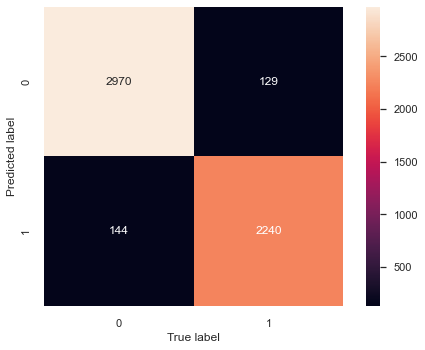

Accuracy:	0.950210
F1-score:	0.949311
Precision:	0.948985
Recall:		0.949652

Classification performance:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3114
           1       0.94      0.95      0.94      2369

    accuracy                           0.95      5483
   macro avg       0.95      0.95      0.95      5483
weighted avg       0.95      0.95      0.95      5483



In [27]:
#Computation and plotting of CNN performance

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # use seaborn plotting style

# Plot the confusion matrix
mat = confusion_matrix(y_test, seq_predictions)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(y_test, seq_predictions))
print("F1-score:\t%f" % f1_score(y_test, seq_predictions, average='macro'))
print("Precision:\t%f" % precision_score(y_test, seq_predictions, average='macro'))
print("Recall:\t\t%f" % recall_score(y_test, seq_predictions, average='macro'))

print("\nClassification performance:\n%s" % classification_report(y_test, seq_predictions))

In [28]:
#Saving the model:
from keras.models import load_model
model.save('model_cnn.h5')

#Load model
model_final = load_model('model_cnn.h5')

#since Sequential model is a TensorFlow Keras model so we have to store it in .h5 file

#Using the loaded model
X_test = tokenizer.texts_to_sequences(["Hi trump is the best"])  
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
seq_predictions=model_final.predict(X_test,verbose=0)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))
# above code from stack overflow: 
#https://stackoverflow.com/questions/46040656/binary-keras-lstm-model-does-not-output-binary-predictions
print("Predicted value:")
print(seq_predictions)


Predicted value:
[1]


# BAYES

In [29]:
#Spliting data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset to a test set with 20% of the emails and a traning set with the rest 80% of the text
samples_train, samples_test, labels_train, labels_test = train_test_split(dataset1, labels_final, test_size=0.2, random_state=99)

no_of_training_samples = len(samples_train)
no_of_test_samples = len(samples_test)
total_samples = no_of_training_samples+no_of_test_samples

print("Total samples:\t\t%4d" % total_samples)
print("Training samples:\t%4d (%2.2f%s)" % (no_of_training_samples,(no_of_training_samples/total_samples)*100,"%"))
print("Test samples:\t\t%4d (%2.2f%s)" % (no_of_test_samples,(no_of_test_samples/total_samples)*100,"%"))

Total samples:		18274
Training samples:	14619 (80.00%)
Test samples:		3655 (20.00%)


In [30]:
#Text classification using Naive Bayes

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Build a Naive Bayes model- set a pipeline where the input is converted to TF-IDF vectors and Multinomial Naive Bayes is used
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(samples_train, labels_train) # Train the model on the training data
predicted_categories = model.predict(samples_test) # Predict the categories of the test data

print("Predicted values:",predicted_categories.tolist()[0:10]) # Print the first 10 predictions
print("True values:",labels_test[0:10]) # Print the first 10 true values

Predicted values: [0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
True values: [0, 0, 1, 0, 0, 0, 0, 1, 1, 1]


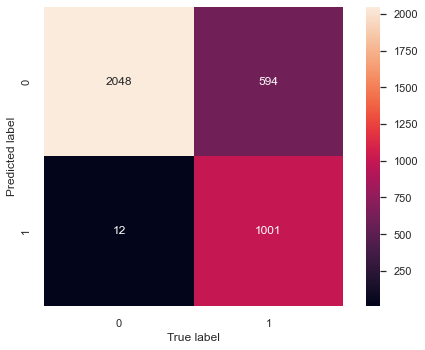

Accuracy:	0.834200
F1-score:	0.819378
Precision:	0.881662
Recall:		0.810880

Classification performance:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2060
           1       0.99      0.63      0.77      1595

    accuracy                           0.83      3655
   macro avg       0.88      0.81      0.82      3655
weighted avg       0.87      0.83      0.83      3655



In [31]:
#Computation and plotting of Naive Bayes's classification performance

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # use seaborn plotting style

# Plot the confusion matrix
mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))

In [32]:
#Saving Bayes Model
import pickle # Import pickle package for object serialisation

# Save to file in the current working directory
pkl_filename = "pickle_model_bayes.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(model, file)

# Using the saved Bayes Model

In [33]:
#Loading and using Bayes model:

# Load model from pickle file
with open("pickle_model_bayes.pkl", 'rb') as file: # Open file as binary file for reading (rb)
    pickle_model_bayes = pickle.load(file)
    
# Use loaded model
news=["Trump is the best pres"]
ans = pickle_model_bayes.predict(news) # Predict the categories of the test data

print(ans)

[0]


# 3-KNN

In [34]:
#Classifictaion Using KNN: 3 nearest neighbours

from sklearn.neighbors import KNeighborsClassifier

# Build the kNN model by setting a pipeline where the input is first converted
# to TF-IDF vectors and then a kNN classifier for k=3 is used
model = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))

model.fit(samples_train, labels_train) # Train the model on the training data
predicted_categories = model.predict(samples_test) # Predict the categories of the test data

print("Predicted:",predicted_categories.tolist()[0:10]) # Print the first 10 predictions
print("Ground truth:",labels_test[0:10]) # Print the first 10 ground truth values

Predicted: [1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Ground truth: [0, 0, 1, 0, 0, 0, 0, 1, 1, 1]


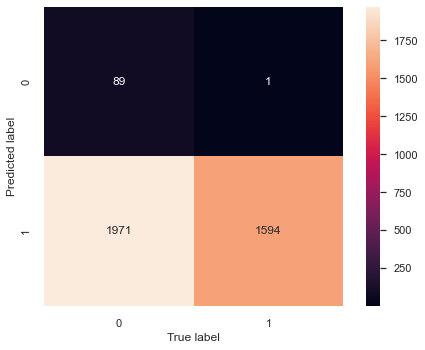

Accuracy:	0.460465
F1-score:	0.350310
Precision:	0.718007
Recall:		0.521288

Classification performance:
              precision    recall  f1-score   support

           0       0.99      0.04      0.08      2060
           1       0.45      1.00      0.62      1595

    accuracy                           0.46      3655
   macro avg       0.72      0.52      0.35      3655
weighted avg       0.75      0.46      0.32      3655



In [35]:
# Plot the confusion matrix and performance of k=3 for knn
mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))

In [36]:
#Saving 3-KNN Model
import pickle # Import pickle package for object serialisation

# Save to file in the current working directory
pkl_filename = "pickle_model_3knn.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(model, file)

# 7 KNN

In [37]:
#Classifictaion Using KNN: 7 nearest neighbours

from sklearn.neighbors import KNeighborsClassifier

# Build the kNN model by setting a pipeline where the input is first converted
# to TF-IDF vectors and then a kNN classifier for k=7 is used
model = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=7))

model.fit(samples_train, labels_train) # Train the model on the training data
predicted_categories = model.predict(samples_test) # Predict the categories of the test data

print("Predicted:",predicted_categories.tolist()[0:10]) # Print the first 10 predictions
print("Ground truth:",labels_test[0:10]) # Print the first 10 ground truth values

Predicted: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Ground truth: [0, 0, 1, 0, 0, 0, 0, 1, 1, 1]


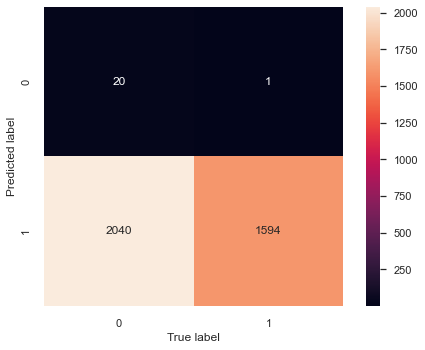

Accuracy:	0.441587
F1-score:	0.314449
Precision:	0.695508
Recall:		0.504541

Classification performance:
              precision    recall  f1-score   support

           0       0.95      0.01      0.02      2060
           1       0.44      1.00      0.61      1595

    accuracy                           0.44      3655
   macro avg       0.70      0.50      0.31      3655
weighted avg       0.73      0.44      0.28      3655



In [38]:
# Plot the confusion matrix and performance of k=7 for knn
mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))

In [39]:
#Saving 7-KNN Model
import pickle # Import pickle package for object serialisation

# Save to file in the current working directory
pkl_filename = "pickle_model_7knn.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(model, file)

# USING THE KNN SAVED MODELS

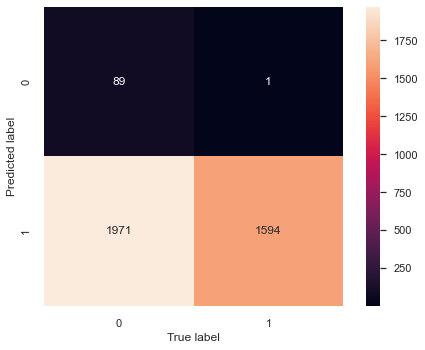

Accuracy:	0.460465
F1-score:	0.350310
Precision:	0.718007
Recall:		0.521288

Classification performance:
              precision    recall  f1-score   support

           0       0.99      0.04      0.08      2060
           1       0.45      1.00      0.62      1595

    accuracy                           0.46      3655
   macro avg       0.72      0.52      0.35      3655
weighted avg       0.75      0.46      0.32      3655



In [40]:
#Loading and using 3knn model:

# Load model from pickle file
with open("pickle_model_3knn.pkl", 'rb') as file: # Open file as binary file for reading (rb)
    pickle_model_3knn = pickle.load(file)
    
# Use loaded model
predicted_categories = pickle_model_3knn.predict(samples_test) # Predict the categories of the test data

# Plot the confusion matrix
mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))

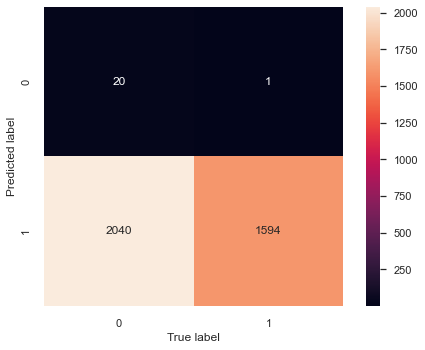

Accuracy:	0.441587
F1-score:	0.314449
Precision:	0.695508
Recall:		0.504541

Classification performance:
              precision    recall  f1-score   support

           0       0.95      0.01      0.02      2060
           1       0.44      1.00      0.61      1595

    accuracy                           0.44      3655
   macro avg       0.70      0.50      0.31      3655
weighted avg       0.73      0.44      0.28      3655



In [41]:
#Loading and using 7knn model:

# Load model from pickle file
with open("pickle_model_7knn.pkl", 'rb') as file: # Open file as binary file for reading (rb)
    pickle_model_7knn = pickle.load(file)
    
# Use loaded model
predicted_categories = pickle_model_7knn.predict(samples_test) # Predict the categories of the test data

# Plot the confusion matrix
mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))

# RNN 

In [42]:
import pandas as pd
d1 = pd.read_csv('fake_news_cleanned.csv')
d1.info

<bound method DataFrame.info of                                                     Text  Label
0      hous dem aid even see comey letter jason chaff...      1
1      flynn hillari clinton big woman campu breitbar...      0
2      whi truth might get fire consortiumnewscom whi...      1
3      civilian kill singl us airstrik identifi jessi...      1
4      iranian woman jail fiction unpublish stori wom...      1
...                                                  ...    ...
18269  rapper ti trump poster child white supremaci j...      0
18270  nfl playoff schedul matchup odd new york time ...      0
18271  maci said receiv takeov approach hudson bay ne...      0
18272  nato russia hold parallel exercis balkan alex ...      1
18273  keep aliv david swanson david swanson author a...      1

[18274 rows x 2 columns]>

In [43]:
#check for nulls
check(d1)

,column,dtypes,nunique,sum_null
0,Text,object,18168,16
1,Label,int64,2,0


In [44]:
arr= d1[d1['Text'].isnull()].index.tolist()
arr.sort(reverse=True)
print(arr)
#finding na 

[18054, 15760, 14163, 12521, 10673, 9723, 8903, 8005, 6780, 6710, 5231, 5059, 4993, 3818, 3564, 1425]


In [45]:
#pip install torchvision 
import torch
from torchtext.legacy import data #For handling text data
from nltk import word_tokenize # Import the word_tokenize function from NLTK

TEXT = data.Field(tokenize=word_tokenize,batch_first=True,include_lengths=True) # Create text field for dataset
LABEL = data.LabelField(dtype = torch.float,batch_first=True) # Create label field for dataset

fields = [('text',TEXT),('label', LABEL)]

# # Load dataset from csv file

dataset=data.TabularDataset(path = 'fake_news_cleanned.csv',format = 'csv',fields = fields,skip_header = True)

print(vars(dataset.examples[0])) # Print first text 

{'text': ['hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'octob', 'subscrib', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'imag', 'courtesi', 'michael', 'jolley', 'avail', 'creativ', 'commonsbi', 'licens', 'apolog', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'thi', 'director', 'jame', 'comey', 'accord', 'hous', 'democrat', 'aid', 'look', 'like', 'also', 'know', 'secondworst', 'person', 'well', 'turn', 'comey', 'sent', 'hi', 'nowinfam', 'letter', 'announc', 'fbi', 'wa', 'look', 'email', 'may', 'relat', 'hillari', 'clinton', 'email', 'server', 'rank', 'democrat', 'relev', 'committe', 'hear', 'comey', 'found', 'via', 'tweet', 'one', 'republican', 'committe', 'chairmen', 'know', 'comey', 'notifi', 'republican', 'chairmen', 'democrat', 'rank', 'member', 'hous', 'intellig', 'judiciari', 'oversight', 'com

In [46]:
for i in arr:
    del dataset.examples[i] 

In [47]:
#Divide to train and test sets:

import random

RANDOM_SEED = 99 # Set random seed for reproducibility. Remove for real applications

# Divide dataset into a training set (70%) and a test set (30%)
training_data, test_data = dataset.split(split_ratio=0.7, random_state = random.seed(RANDOM_SEED))

print("Training samples:",len(training_data))
print("Test samples:",len(test_data))


Training samples: 12781
Test samples: 5477


In [48]:
#Finding vocabulary:

TEXT.build_vocab(training_data,min_freq=1)  # Build vocabulary from training set. Consider words that occur at least 1 time
LABEL.build_vocab(training_data) # Build vocabulary for labels

print("Size of TEXT vocabulary:",len(TEXT.vocab)) # Number of unique tokens in vocabulary
print("Size of LABEL vocabulary:",len(LABEL.vocab),"\n") # Number of unique labels

print("Most common tokens:",TEXT.vocab.freqs.most_common(10),"\n")  # Print the 10 most common tokens in the training set

# Print the index number for the unknown token (<unk>) and the token used for padding (<pad>)
print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])

Size of TEXT vocabulary: 45993
Size of LABEL vocabulary: 2 

Most common tokens: [('wa', 14088), ('trump', 13256), ('hi', 10257), ('ha', 9998), ('new', 9974), ('thi', 9851), ('time', 8753), ('said', 8646), ('mr', 6347), ('state', 6102)] 

Index of unknown word <unk>: 0
Index of padding word <pad>: 1


In [49]:
#Creating iterator for training and testing:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Set device to GPU if cuda available, else CPU
print("Device:",device)

torch.manual_seed(RANDOM_SEED)

BATCH_SIZE = 32 #Set batch size for training

# Create data iterator for training and test sets
training_iterator, test_iterator = data.BucketIterator.splits(
    (training_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device = device)

Device: cpu


In [50]:
import torch.nn as nn

class FakeNewsNet(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout):
        
        super().__init__()              
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # Word embedding layer
        self.lstm = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout,
                           batch_first=True) # LSTM layer
        self.fc1 = nn.Linear(hidden_dim * 2, output_dim) # Dense layer
        self.act = nn.Sigmoid()
        
    def forward(self, text, text_lengths):
        embedded = self.embedding(text) # Create embedding of the input text
        # Handle padding to ignore padding during training of the RNN
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
     
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1) # Concatenate the final forward and backward hidden state             
        dense_outputs=self.fc1(hidden)
        outputs=self.act(dense_outputs) # Apply sigmoid activation function to output
    
        return outputs

In [51]:
# Set hyperparameters for network architecture and training
vocabulary_size = len(TEXT.vocab)
embedding_dimensions = 10 # Set to 10 for faster computations. Larger numbers typically required
LSTM_no_of_hidden_nodes = 16 # The number of features in the hidden state h of the LSTM
LSTM_no_of_recurrent_layers = 2 # Number of recurrent layers for RNN (to be stacked)
LSTM_bidirection = True # Set to True for bidirectional LSTM (BiLSTM)
LSTM_dropout = 0.2 # If not 0, introduces a dropout layer in the output of the LSTM
output_size = 1 # Size of output layer

# Initialise the model
model = FakeNewsNet(vocabulary_size, embedding_dimensions, LSTM_no_of_hidden_nodes, 
                    output_size, LSTM_no_of_recurrent_layers, 
                    bidirectional = LSTM_bidirection,dropout = LSTM_dropout)

print("Model architecture:\n",model) # Print model's architecture

def count_parameters(model): # Computes the number of trainable parameters in the model
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print("\nThe model has",count_parameters(model),"trainable parameters")

Model architecture:
 FakeNewsNet(
  (embedding): Embedding(45993, 10)
  (lstm): LSTM(10, 16, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=1, bias=True)
  (act): Sigmoid()
)

The model has 469947 trainable parameters


In [52]:
#Define the optimiser, loss function and performance metric
import torch.optim as optim

optimizer = optim.Adam(model.parameters()) # Use the Adam optimiser
criterion = nn.BCELoss() # Use Binary Cross Entropy between the target and the output as the loss function

# Define binary accuracy metric
def binary_accuracy(preds, y):
    rounded_preds = torch.round(preds) # Round predictions to the closest integer
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# Sent model to device
model = model.to(device)
criterion = criterion.to(device)

In [53]:
#Define training func
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()  # Set the model in training phase
    for batch in iterator:
        optimizer.zero_grad()   # Reset the gradients after every batch
        text, text_lengths = batch.text   # Retrieve text and number of words
        predictions = model(text, text_lengths).squeeze()  # Convert to 1D tensor
        loss = criterion(predictions, batch.label)    # Compute the loss    
        acc = binary_accuracy(predictions, batch.label)   # Compute the binary accuracy
        loss.backward()   # Backpropagation   
        optimizer.step()   # Update the weights
        # Update epoch's loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()    
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#Evaluvation func
def evaluate(model, iterator, criterion): 
    epoch_loss = 0
    epoch_acc = 0
    model.eval() # Set the model in evaluation phase
    with torch.no_grad(): #Deactivates autograd
        for batch in iterator:
            text, text_lengths = batch.text # Retrieve text and number of words
            predictions = model(text, text_lengths).squeeze() # Convert to 1d tensor
            loss = criterion(predictions, batch.label) # Compute loss and accuracy
            acc = binary_accuracy(predictions, batch.label)
            # Update epoch's loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [54]:
#Training the lstm

import time

N_EPOCHS = 4
best_valid_loss = float('inf')
best_valid_acc = float('inf')
best_epoch = 0

for epoch in range(N_EPOCHS):
    print("Epoch %3d:" % epoch,end='')
    start = time.time()
    #train the model
    train_loss, train_acc = train(model, training_iterator, optimizer, criterion)
    #evaluate the model
    valid_loss, valid_acc = evaluate(model, test_iterator, criterion)
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_valid_acc = valid_acc
        best_epoch = epoch
        torch.save(model.state_dict(), 'saved_weights.pt') # Save weights 
    print(" Train loss: %.3f | Train acuracy: %3.4f " % (train_loss,train_acc),end='')
    print("| Validation loss: %.3f | Validation acuracy: %3.4f" % (valid_loss,valid_acc),end='')
    print(" - %3.2f s" % (time.time()-start))

print("\nBest performance at epoch %d | Loss: %.3f | Accuracy: %3.4f" % (best_epoch,best_valid_loss,best_valid_acc))

Epoch   0: Train loss: 0.547 | Train acuracy: 0.6835 | Validation loss: 0.383 | Validation acuracy: 0.8285 - 110.07 s
Epoch   1: Train loss: 0.290 | Train acuracy: 0.8735 | Validation loss: 0.213 | Validation acuracy: 0.9186 - 112.70 s
Epoch   2: Train loss: 0.161 | Train acuracy: 0.9401 | Validation loss: 0.167 | Validation acuracy: 0.9364 - 133.81 s
Epoch   3: Train loss: 0.109 | Train acuracy: 0.9630 | Validation loss: 0.133 | Validation acuracy: 0.9548 - 133.66 s

Best performance at epoch 3 | Loss: 0.133 | Accuracy: 0.9548


In [55]:
def predict(model, sentence):
    tokenised = [token for token in word_tokenize(sentence)]   # Tokenise text 
    indexed = [TEXT.vocab.stoi[token] for token in tokenised]  # Convert tokens to integers
    length = [len(indexed)]                                    # Compute number of words
    tensor = torch.LongTensor(indexed).to(device)              # Convert to PyTorch tensor
    tensor = tensor.unsqueeze(1).T                             # Reshape in form of batch,number of words
    length_tensor = torch.LongTensor(length)                   # Convert to PyTorch tensor
    prediction = model(tensor, length_tensor)                  # Predict text
    return int(round(prediction.item()))

news='Trump wants to go to mars'
label_names = {0: "REAL",1:"FAKE"}

print(news,"->",label_names[predict(model,news)])

Trump wants to go to mars -> FAKE


In [56]:
# Eg of how to fetch data and label 
type(test_data[0].text)
test_data[0].text
# test_data[0].label
news = ' '.join([str(elem) for elem in test_data[0].text])
news

'ninth circuit would allow hijack sue come us joel b pollak judgment ninth circuit uphold temporari restrain order tro presid donald trump recent execut order restrict travel seven countri would allow one hijack sue govern come stay unit state court novel theori legal stand injuri public univers result foreign student teacher abl enter countri give state stand sue moreov court held foreign visa due process right fifth amend u constitut even though preced cite appli peopl alreadi unit state due process right could also assert state behalf peopl u illeg relationship u resid institut court held rule hani hasan hanjour wa one four pilot septemb attack flew american airlin flight pentagon kill peopl includ everyon flight wa'

In [57]:
pred_val= []
true_val= []
for i in test_data:
    news = ' '.join([str(elem) for elem in i.text])
    pred_val.append(predict(model,news))
    true_val.append(int(i.label))
    
print(pred_val[0:10])
print(true_val[0:10])

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


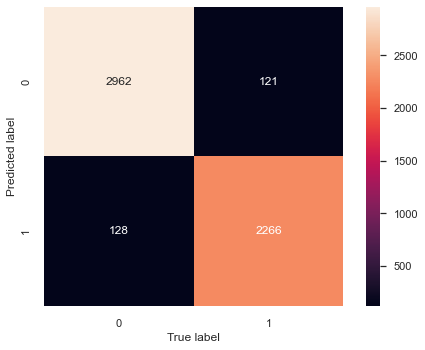

Accuracy:	0.954537
F1-score:	0.953791
Precision:	0.953643
Recall:		0.953942

Classification performance:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3090
           1       0.95      0.95      0.95      2387

    accuracy                           0.95      5477
   macro avg       0.95      0.95      0.95      5477
weighted avg       0.95      0.95      0.95      5477



In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # use seaborn plotting style

# Plot the confusion matrix
mat = confusion_matrix(true_val, pred_val)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(true_val, pred_val))
print("F1-score:\t%f" % f1_score(true_val, pred_val, average='macro'))
print("Precision:\t%f" % precision_score(true_val, pred_val, average='macro'))
print("Recall:\t\t%f" % recall_score(true_val, pred_val, average='macro'))

print("\nClassification performance:\n%s" % classification_report(true_val, pred_val))

In [59]:
#Saving RNN Model
import pickle # Import pickle package for object serialisation

# Save to file in the current working directory
pkl_filename = "pickle_model_rnn.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(model, file)

In [60]:
# Load model from pickle file
with open("pickle_model_rnn.pkl", 'rb') as file: # Open file as binary file for reading (rb)
    pickle_model_rnn = pickle.load(file)
news='Trump wants to go to mars'
label_names = {0: "REAL",1:"FAKE"}

print(news,"->",label_names[predict(pickle_model_rnn,news)])
    


Trump wants to go to mars -> FAKE


Store the five trained models in files and implement a function “predict_reliability(text, model)”
that given a text string (“text”) and model filename (“model”), it will load the pre-trained model,
and predict the article reliability of the input text. The function should be able to work without
requiring to rerun all or part of your code. (10%)

In [65]:
def predict_reliability(text, model):
    print("------------")
    print("Model Name: ", model)
    print("News to check: ", text)
    if model =="pickle_model_bayes.pkl" or model =="pickle_model_3knn.pkl" or model =="pickle_model_7knn.pkl":
        with open(model, 'rb') as file: # bayes block
            m1 = pickle.load(file)
            ans= m1.predict([text])
            if ans ==[0]: print("Real")
            else: print("Fake")
            return
        
    if model=='pickle_model_rnn.pkl':
        with open("pickle_model_rnn.pkl", 'rb') as file: # RNN
            m1 = pickle.load(file)
            tokenised = [token for token in word_tokenize(text)]   # Tokenise text 
            indexed = [TEXT.vocab.stoi[token] for token in tokenised]  # Convert tokens to integers
            length = [len(indexed)]                                    # Compute number of words
            tensor = torch.LongTensor(indexed).to(device)              # Convert to PyTorch tensor
            tensor = tensor.unsqueeze(1).T                             # Reshape in form of batch,number of words
            length_tensor = torch.LongTensor(length)                   # Convert to PyTorch tensor
            prediction = m1(tensor, length_tensor)
            ans= (int(round(prediction.item())))
            if ans==0: print("Real")
            else: print("Fake")
            return
        
    if model=='model_cnn.h5':
        model_final = load_model('model_cnn.h5') #CNN
        X_test = tokenizer.texts_to_sequences([text])  
        X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
        ans=model_final.predict(X_test,verbose=0)
        ans=np.transpose(seq_predictions)[0]  # transformation to get (n,)
        ans = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))
        print(ans)
        if ans ==[0]: print("Real")
        else: print("Fake")
        return
         
    else:
        print("Invalid model")
        return
   
    
news="biden is ready to travel to the mars and moon with his wife"
predict_reliability(news, 'pickle_model_7knn.pkl')
predict_reliability(news, 'pickle_model_3knn.pkl')
predict_reliability(news, 'pickle_model_bayes.pkl')
predict_reliability(news, 'pickle_model_rnn.pkl')
predict_reliability(news, 'model_cnn.h5')
predict_reliability(news, 'abc.pkl')


------------
Model Name:  pickle_model_7knn.pkl
News to check:  biden is ready to travel to the mars and moon with his wife
Fake
------------
Model Name:  pickle_model_3knn.pkl
News to check:  biden is ready to travel to the mars and moon with his wife
Fake
------------
Model Name:  pickle_model_bayes.pkl
News to check:  biden is ready to travel to the mars and moon with his wife
Real
------------
Model Name:  pickle_model_rnn.pkl
News to check:  biden is ready to travel to the mars and moon with his wife
Fake
------------
Model Name:  model_cnn.h5
News to check:  biden is ready to travel to the mars and moon with his wife
[1]
Fake
------------
Model Name:  abc.pkl
News to check:  biden is ready to travel to the mars and moon with his wife
Invalid model
